In [13]:
import os
import shutil # Not strictly needed for size, but often useful with datasets
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration ---
# Adjust these paths to match your project structure

# Path to the root of your ORIGINAL dataset (e.g., where 'train' and 'test' are)
# This should be the same as SOURCE_DATA_ROOT in your ingestion script
ORIGINAL_DATASET_ROOT = "db/SHdataset_12k" # Example: "/home/gabbe/projetos/artigo-erbase/db/SHdataset_12k"

# Path to your POPULATED Deep Lake dataset directory
# This should be the same as DEEPLAKE_DATASET_PATH in your creation/ingestion script
DEEPLAKE_DATASET_PATH = "dl_datasets/shdataset_12k" # Example: "/home/gabbe/projetos/artigo-erbase/dl_datasets/shdataset_12k_empty_png_storage"

# --- Make sure paths are absolute for clarity if running notebook from different locations ---
# (Alternatively, ensure your notebook is in the project root where relative paths make sense)
# PROJECT_ROOT = "/home/gabbe/projetos/artigo-erbase" # Define your project root
# ORIGINAL_DATASET_ROOT = os.path.join(PROJECT_ROOT, "db/SHdataset_12k")
# DEEPLAKE_DATASET_PATH = os.path.join(PROJECT_ROOT, "dl_datasets/shdataset_12k_empty_png_storage")


# --- Sanity check if paths exist ---
if not os.path.exists(ORIGINAL_DATASET_ROOT):
    print(f"ERROR: Original dataset path not found: {os.path.abspath(ORIGINAL_DATASET_ROOT)}")
    print("Please check the ORIGINAL_DATASET_ROOT variable.")
    # raise FileNotFoundError(f"Original dataset path not found: {os.path.abspath(ORIGINAL_DATASET_ROOT)}") # Or raise error

if not os.path.exists(DEEPLAKE_DATASET_PATH):
    print(f"ERROR: Deep Lake dataset path not found: {os.path.abspath(DEEPLAKE_DATASET_PATH)}")
    print("Please check the DEEPLAKE_DATASET_PATH variable. Ensure the dataset is created AND populated.")
    # raise FileNotFoundError(f"Deep Lake dataset path not found: {os.path.abspath(DEEPLAKE_DATASET_PATH)}") # Or raise error

print(f"Original dataset path: {os.path.abspath(ORIGINAL_DATASET_ROOT)}")
print(f"Deep Lake dataset path: {os.path.abspath(DEEPLAKE_DATASET_PATH)}")

Original dataset path: /home/gabbe/projetos/artigo-erbase/db/SHdataset_12k
Deep Lake dataset path: /home/gabbe/projetos/artigo-erbase/dl_datasets/shdataset_12k


In [14]:
def get_directory_size_bytes(directory_path):
    """Calculates the total size of all files in a directory and its subdirectories."""
    total_size = 0
    if not os.path.exists(directory_path):
        print(f"Warning: Directory not found at {directory_path}. Returning size 0.")
        return 0
        
    for dirpath, dirnames, filenames in os.walk(directory_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                try:
                    total_size += os.path.getsize(fp)
                except FileNotFoundError:
                    print(f"Warning: File not found during size calculation: {fp}")
    return total_size

def bytes_to_megabytes(size_in_bytes):
    """Converts bytes to megabytes."""
    return size_in_bytes / (1024 * 1024)

In [15]:
# Calculate size of the original dataset
original_dataset_size_bytes = 0
if os.path.exists(ORIGINAL_DATASET_ROOT):
    original_dataset_size_bytes = get_directory_size_bytes(ORIGINAL_DATASET_ROOT)
    original_dataset_size_mb = bytes_to_megabytes(original_dataset_size_bytes)
    print(f"Original Dataset Size: {original_dataset_size_bytes} bytes ({original_dataset_size_mb:.2f} MB)")
else:
    original_dataset_size_mb = 0
    print("Original dataset not found, size set to 0 MB for plotting.")


# Calculate size of the Deep Lake dataset
# IMPORTANT: This assumes the Deep Lake dataset has been POPULATED with data.
# If it's just an empty schema, its size will be very small.
deeplake_dataset_size_bytes = 0
if os.path.exists(DEEPLAKE_DATASET_PATH):
    deeplake_dataset_size_bytes = get_directory_size_bytes(DEEPLAKE_DATASET_PATH)
    deeplake_dataset_size_mb = bytes_to_megabytes(deeplake_dataset_size_bytes)
    print(f"Deep Lake Dataset Size: {deeplake_dataset_size_bytes} bytes ({deeplake_dataset_size_mb:.2f} MB)")
else:
    deeplake_dataset_size_mb = 0
    print("Deep Lake dataset not found, size set to 0 MB for plotting.")

Original Dataset Size: 28176156041 bytes (26870.88 MB)
Deep Lake Dataset Size: 44868010009 bytes (42789.47 MB)


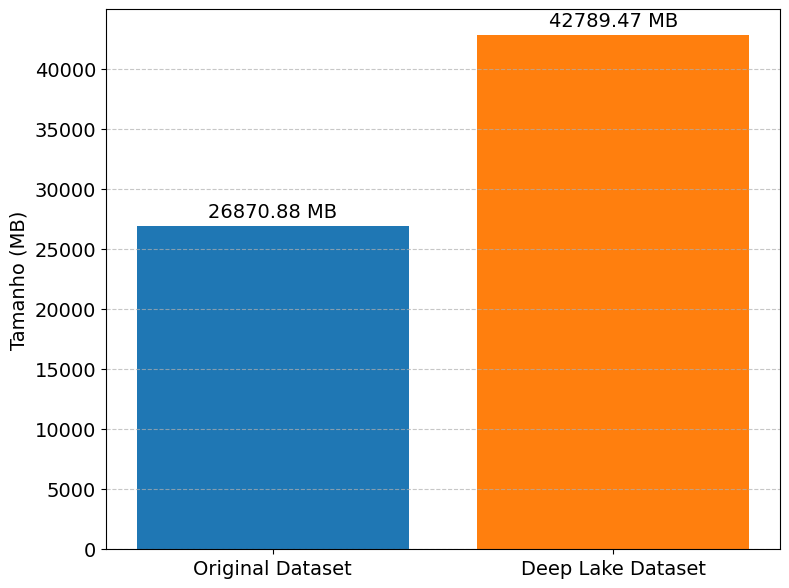

In [16]:
import matplotlib.pyplot as plt

# ... [assumindo que original_dataset_size_mb, deeplake_dataset_size_mb, etc. já estão definidos]

labels = ['Original Dataset', 'Deep Lake Dataset']
sizes_mb = [original_dataset_size_mb, deeplake_dataset_size_mb]
colors = ['#1f77b4', '#ff7f0e']  # You can choose any colors you like

if original_dataset_size_mb == 0 and deeplake_dataset_size_mb == 0 and \
   (not os.path.exists(ORIGINAL_DATASET_ROOT) or not os.path.exists(DEEPLAKE_DATASET_PATH)):
    print("\nCannot generate plot: One or both dataset paths are invalid or sizes are zero due to missing directories.")
else:
    plt.figure(figsize=(8, 6))
    bars = plt.bar(labels, sizes_mb, color=colors)

    # Add text labels on top of each bar with larger font
    for bar in bars:
        yval = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width()/2.0,
            yval + (0.01 * max(sizes_mb) if max(sizes_mb) > 0 else 0.1),
            f"{yval:.2f} MB",
            ha='center', va='bottom',
            fontsize=14  # Aumenta a fonte do texto acima das barras
        )

    plt.ylabel('Tamanho (MB)', fontsize=14)  # Fonte maior para o eixo Y
    plt.xticks(rotation=0, fontsize=14)              # Fonte dos rótulos do eixo X
    plt.yticks(fontsize=14)                          # Fonte dos valores do eixo Y
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
